# Afficher les 5 principales villes en fonction des ventes
- Visualisation: Ventes par produit + comparaison année précédente

Top 5 régions par ventes :
   Delivery Region Index      Sales
0                     23  2227843.8
1                      6  2119424.4
2                     35  2058320.4
3                     67  1923563.3
4                     24  1915643.9


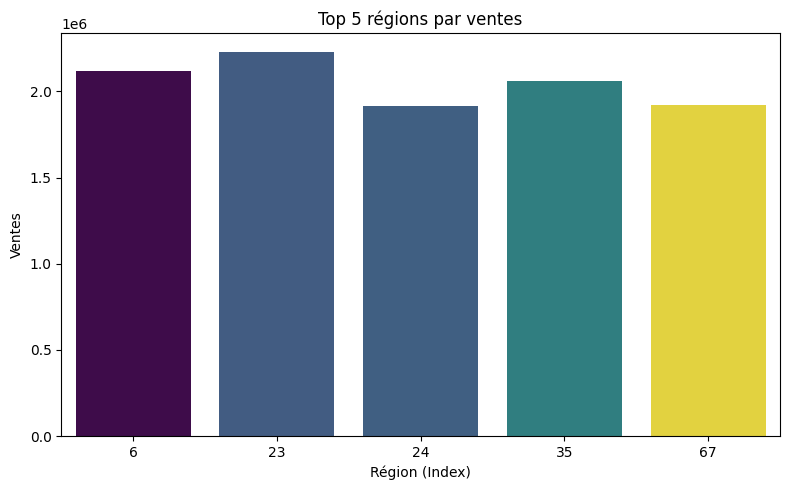


Comparaison des bénéfices par canal de vente :
       Channel  Year       Profit    Profit PY  Profit Var  Profit Var %
0  Distributor  2017   6252126.17          NaN         NaN           NaN
1  Distributor  2018   6317647.08   6252126.17    65520.91          1.05
2  Distributor  2019   5856389.13   6317647.08  -461257.95         -7.30
3       Export  2017   3346461.46          NaN         NaN           NaN
4       Export  2018   2495570.17   3346461.46  -850891.29        -25.43
5       Export  2019   2786413.35   2495570.17   290843.18         11.65
6    Wholesale  2017  10079184.53          NaN         NaN           NaN
7    Wholesale  2018  10975972.29  10079184.53   896787.76          8.90
8    Wholesale  2019   9679378.71  10975972.29 -1296593.58        -11.81


In [2]:
# Ajouter les colonnes calculées si ce n'est pas encore fait
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lire le fichier
df = pd.read_excel("sales.xlsx")

# Créer les colonnes calculées correctement
df["Sales"] = df["Order Quantity"] * df["Unit Selling Price"]
df["Cost"] = df["Order Quantity"] * df["Unit Cost"]
df["Profit"] = df["Sales"] - df["Cost"]

# Créer la table de dates à partir de OrderDate
date_range = pd.date_range(start=df["OrderDate"].min(), end=df["OrderDate"].max(), freq='D')
date_table = pd.DataFrame({"Date": date_range})

date_table["Year"] = date_table["Date"].dt.year
date_table["Month"] = date_table["Date"].dt.month
date_table["Month Name"] = date_table["Date"].dt.strftime('%B')
date_table["Quarter"] = date_table["Date"].dt.quarter
date_table["Day"] = date_table["Date"].dt.day
date_table["Day Name"] = date_table["Date"].dt.strftime('%A')
date_table["Week"] = date_table["Date"].dt.isocalendar().week

# Renommer la colonne pour correspondre à OrderDate
date_table_renamed = date_table.rename(columns={"Date": "OrderDate"})
# Fusion
df_merged = pd.merge(df, date_table_renamed, on="OrderDate", how="left")

# Top 5 des régions (ou villes) par ventes
top5_regions = df.groupby("Delivery Region Index").agg({
    "Sales": "sum"
}).sort_values(by="Sales", ascending=False).head(5).reset_index()

# Affichage
print("Top 5 régions par ventes :")
print(top5_regions)

plt.figure(figsize=(8, 5))
sns.barplot(data=top5_regions, x="Delivery Region Index", y="Sales", hue="Delivery Region Index", palette="viridis", legend=False)
plt.title("Top 5 régions par ventes")
plt.xlabel("Région (Index)")
plt.ylabel("Ventes")
plt.tight_layout()
plt.show()

# Comparer les bénéfices par canal de vente (Channel) avec ceux de l’année précédente
print("\nComparaison des bénéfices par canal de vente :")
# Regrouper par canal et année
channel_profit = df_merged.groupby(["Channel", "Year"]).agg({
    "Profit": "sum"
}).reset_index()

# Trier les données par canal et année pour appliquer le shift
channel_profit = channel_profit.sort_values(by=["Channel", "Year"])

# Calcul de la colonne "Profit PY"
channel_profit["Profit PY"] = channel_profit.groupby("Channel")["Profit"].shift(1)

# Calcul de la variation absolue et en pourcentage
channel_profit["Profit Var"] = channel_profit["Profit"] - channel_profit["Profit PY"]
channel_profit["Profit Var %"] = (channel_profit["Profit Var"] / channel_profit["Profit PY"]) * 100

# Affichage
print(channel_profit.round(2))
